# Visualizing and Animating Optimization Algorithms with Matplotlib

In this series of notebooks, we demonstrate some useful patterns and recipes for visualizing animating optimization algorithms using Matplotlib.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

In [141]:
f  = lambda x, y: 2342.1971697181*x**0.2857 + 8730.1851*(y/x)**0.2857 + 62823.6915040394*(1/y)**0.2857 - 26190.5553

xmin, xmax, xstep = 100, 400, 10
ymin, ymax, ystep = 100, 900, 10

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)

#We know the global minima is at  (215.44, 464.16)

minima = np.array([215.44, 464.16])

f(*minima)

6421.490224461435

In [4]:
minima_ = minima.reshape(-1, 1)
minima_

array([[215.44],
       [464.16]])

In [5]:
f(*minima_)

array([6421.49022446])

3D surface plot

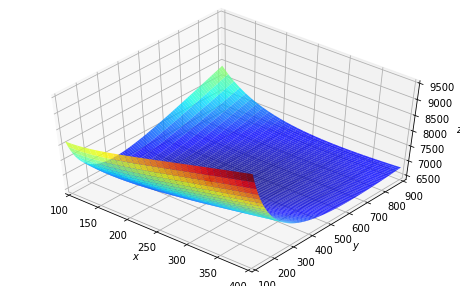

In [142]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

2D Contour Plot and Gradient Vector Field

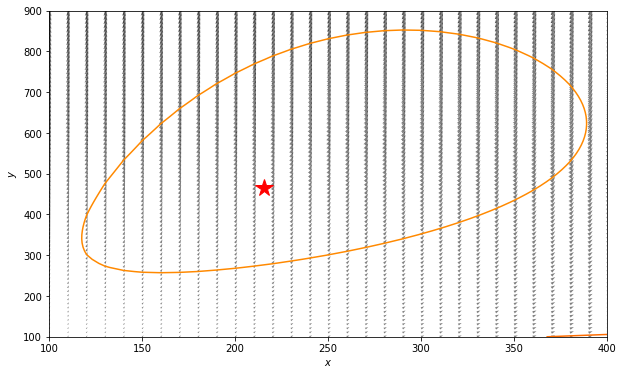

In [143]:
#We use autograd to compute the gradient vector field, and plot it with Matplotlib's quiver method.

dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

Gradient-based Optimization

In [149]:
#initial point x0

x0 = np.array([350., 800.])

#Again, we use autograd to compute the gradients, and augment the function slightly to adhere to Scipy's optimization interface.

func = value_and_grad(lambda args: f(*args))

res = minimize(func, x0=x0, method='BFGS',
               jac=True, tol=1e-20, callback=print)

[331.30040299 789.99054589]
[290.84637054 767.9376697 ]
[237.91082551 737.87789958]
[258.64664176 748.46310472]
[249.99875329 737.39328725]
[240.98432409 719.01509551]
[229.48124989 686.07454083]
[213.43209673 624.56584179]
[191.21604827 506.06367069]
[189.2138263  424.59079939]
[204.70535334 458.87756075]
[213.6144673  463.10314981]
[215.3004422  464.04777812]
[215.44112716 464.15369441]
[215.44342991 464.15844361]
[215.44347499 464.15886864]
[215.44346926 464.15888353]
[215.44346909 464.15888342]


In [150]:
dict(res)

{'fun': 6421.490224191872, 'hess_inv': array([[ 34.85964731,  37.43883816],
        [ 37.43883816, 160.71036769]]), 'jac': array([ 2.88173574e-09, -2.83202795e-10]), 'message': 'Desired error not necessarily achieved due to precision loss.', 'nfev': 25, 'nit': 18, 'njev': 24, 'status': 2, 'success': False, 'x': array([215.44346909, 464.15888342])}

In [151]:
#Let us define a new callback function that appends the intermediate values to a list instead of simply printing it.

def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

#We initialize the list with the starting value.

path_ = [x0]

res = minimize(func, x0=x0, method='BFGS',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))

dict(res)

{'fun': 6421.490224191872, 'hess_inv': array([[ 34.85964731,  37.43883816],
        [ 37.43883816, 160.71036769]]), 'jac': array([ 2.88173574e-09, -2.83202795e-10]), 'message': 'Desired error not necessarily achieved due to precision loss.', 'nfev': 25, 'nit': 18, 'njev': 24, 'status': 2, 'success': False, 'x': array([215.44346909, 464.15888342])}

In [152]:
#We cast the list to a NumPy array and transpose it so it's easier and more natural to work with.

path = np.array(path_).T
path.shape

(2, 19)

Static Quiver Plot of Path on 2D Contour Plot

(100.0, 900.0)

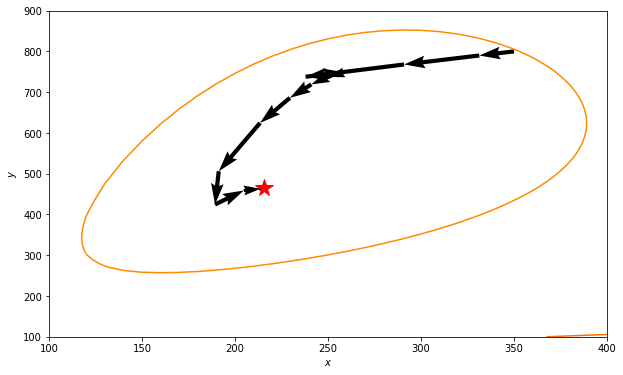

In [153]:
#Again, using the quiver method, but in a slightly different way than before, 
#we can represent each step, it's length and direction, using the arrows.

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

Static Quiver Plot of Path on 3D Surface Plot

In [ ]:
#However, this is slightly less useful when plotted against a 3D surface plot...

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], f(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], f(*(path[::,1:]-path[::,:-1])), 
          color='k')
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

Animating Single Path on 2D Contour Plot

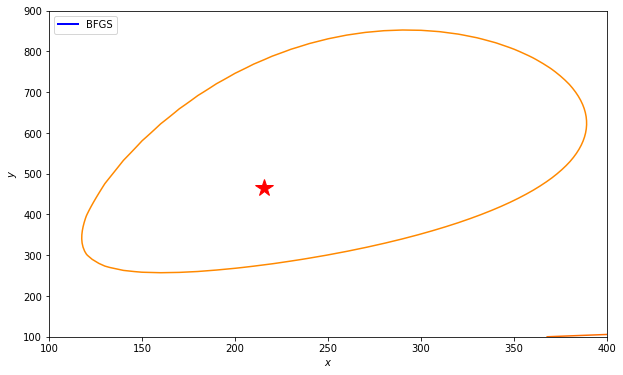

In [155]:
#We can also animate the trajectory of the optimization algorithm using the excellent FuncAnimation class. 
#First we draw the 2D contour plot as we did before, and initialize the line and point (which are Line2D objects). 
#Guides on how to use the FuncAnimation class can be found in tutorials such as Jake Vanderplas' Matplotlib Animation Tutorial.

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label='BFGS', lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [156]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

#We define our animation to draw the path up to  i th intermediate point on the  i th frame.

def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

#We define the total number of frames to be the total number of steps taken in the optimization 
#and using blitting so as to only redraw the parts of the animation that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

HTML(anim.to_html5_video())

Animating Single Path on 3D Surface Plot

(100.0, 900.0)

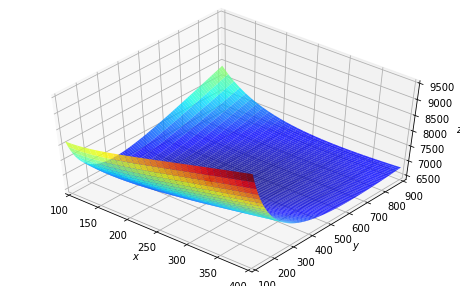

In [157]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

line, = ax.plot([], [], [], 'b', label='BFGS', lw=2)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

In [158]:
#We just have to make use of the set_3d_properties method for Line3D objects to set the height of the points on the path.

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(f(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(f(*path[::,i-1:i]))
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

HTML(anim.to_html5_video())

Modularizing and Generalizing to Animate Multiple Paths Simultaneously

In [159]:
#Instead of initializing the line and point in the global scope, 
#and defining the animation callback functions to use those global variables, we can encapsulate everything in a closure.

#Or better yet, we could just create subclass of FuncAnimation that is initialized with a variable number of paths to plot. 
#In the initialization method, we just create and save the list of Line2D objects as attributes, 
#and define animation callback methods that use these attributes.

class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

In [160]:
#We can extend this to 3-dimensions quite easily:

class TrajectoryAnimation3D(animation.FuncAnimation):
    
    def __init__(self, *paths, zpaths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths
        self.zpaths = zpaths
        
        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]

        super(TrajectoryAnimation3D, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line in self.lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return self.lines

    def animate(self, i):
        for line, path, zpath in zip(self.lines, self.paths, self.zpaths):
            line.set_data(*path[::,:i])
            line.set_3d_properties(zpath[:i])
        return self.lines

In [ ]:
#Note that TrajectoryAnimation3D is defined as an altogether different subclass of FuncAnimation here. 

#A more elegant approach would be to subclass the TrajectoryAnimation class defined above, 
#but this would make this exposition much less readable.

#Additionally, note that we don't plot the leading point marker here, 
#since this tends to clutter up the visualization on the 3D surface plots.

SciPy' Gradient-based Optimization Algorithms

In [165]:
#Now let's take these newly defined classes out for a spin! 
#Let us simultaneously animate SciPy's gradient-based optimization algorithms.

methods = [
    "CG",
    "BFGS",
#   "Newton-CG",
    "L-BFGS-B",
#   "TNC",
    "SLSQP",
#   "dogleg",
#   "trust-ncg"
]

In [166]:
#We do some partial function application here to reduce the amount of code required..

minimize_ = partial(minimize, fun=func, x0=x0, jac=True, bounds=[(xmin, xmax), (ymin, ymax)], tol=1e-20)

#Initialize the trajectories

paths_ = defaultdict(list)
for method in methods:
    paths_[method].append(x0)

results = {method: minimize_(method=method, callback=make_minimize_cb(paths_[method])) for method in methods}

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


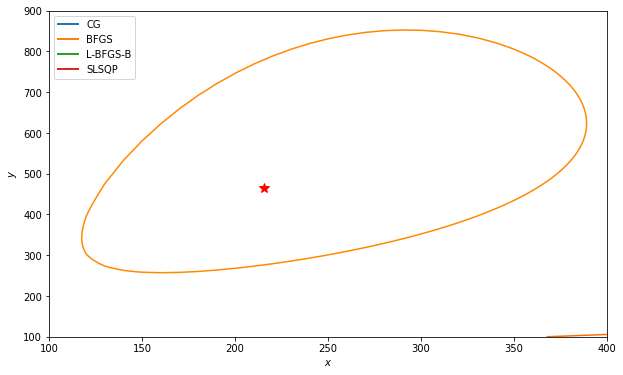

In [167]:
#We expected these warnings, and can safely ignore them here.

paths = [np.array(paths_[method]).T for method in methods]

zpaths = [f(*path) for path in paths]

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths, labels=methods, ax=ax)

ax.legend(loc='upper left')

In [168]:
HTML(anim.to_html5_video())

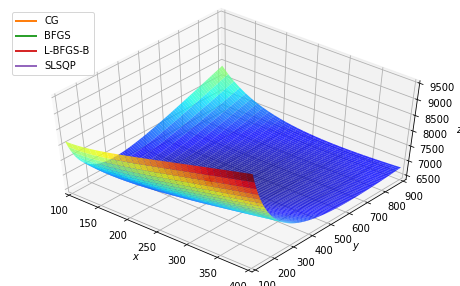

In [169]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation3D(*paths, zpaths=zpaths, labels=methods, ax=ax)

ax.legend(loc='upper left')

In [170]:
HTML(anim.to_html5_video())

In [ ]:
#Having the TrajectoryAnimation class at our disposal makes it incredibly simple to not only visualize, 
#but animate optimization procedures, and allows us to better understand 
#and be able to visually debug the optimization problems and algorithms we are working with.

#Furthermore, the fact that TrajectoryAnimation is a subclass of FunAnimation means we have the flexibility of exporting 
#and presenting these animations in a variety of formats, e.g. exporting as GIFs, embedding them in Jupyter Notebooks as HTML5 videos. 
#This can make our presentations far more compelling.